In [1]:
from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakNet
from nodes.core import layer

import random
import matplotlib.pyplot as plt

random.seed(42)

inputlayer = layer()
foldiaklayer = layer()

for i in range(16):
    foldiaklayer.append(FoldiakNode(0.5))
for i in range(64):
    #I really need a way to make layers able to store multidimensional arrays; eventually, this would be an 8x8 (or larger)
    #Actually, lets do 28x28 so I can run MNIST through this
    inputlayer.append(InputNode(0))
    
network = FoldiakNet()
network.append(inputlayer)
network.append(foldiaklayer)
network.connect_layer_hebbian(inputlayer, foldiaklayer)
network.connect_self_antihebbian(foldiaklayer)

network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)
network.setparam("p",0.1)
network.setparam("l",10)

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))/16.0

In [4]:
data.shape

(1797, 64)

In [11]:
#Steady state thres:
network.setparam("a",0.0)
network.setparam("b",0.0)
network.setparam("y",0.5)
for i in inputlayer.nodes:
    i.setvalstored(random.uniform(0,1))
for i in range(200):
    network.update()

In [60]:
network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)

numrun = 0
outrun = 3
inrun = 3
nummax = outrun * inrun * data.shape[0]
for num in range(outrun):
    for sample in data:
        for num2 in range(inrun):
            datalist = sample.tolist()
            for i in range(len(inputlayer.nodes)):
                inputlayer.nodes[i].setvalstored(datalist[i])
            network.update()
            numrun += 1
            if ((numrun % 1000) == 0):
                print(str(numrun)+"/"+str(nummax))
print(str(nummax)+"/"+str(nummax))

1000/16173
2000/16173
3000/16173
4000/16173
5000/16173
6000/16173
7000/16173
8000/16173
9000/16173
10000/16173
11000/16173
12000/16173
13000/16173
14000/16173
15000/16173
16000/16173
16173/16173


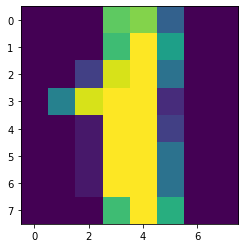

In [73]:
j = 1
for i in range(len(data[j])):
    inputlayer.nodes[i].setvalstored(data[j].tolist()[i])

plt.imshow(data[j].reshape(8,8))
plt.show()

In [74]:
network.update()
outlist = []
for i in foldiaklayer.nodes:
    outlist.append(i.returnval())
outlist

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [75]:
num = 0
for i in network.connects:
    if (num < 10):
        if i.input in foldiaklayer.nodes:
            print(i.bias)
            num+=1

-1.8987000000002876
-0.3629000000002873
-0.5043000000002851
-1.1029000000002915
-0.7543000000002835
-1.9228999999975978
-0.631500000000287
-0.5229000000002877
-1.422900000000291
-2.3428999999967144


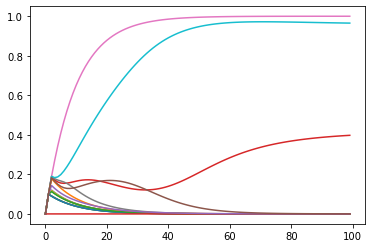

In [76]:
network.foldiaksetup()
plot = []
for i in foldiaklayer.nodes:
    plot.append([])
for i in range(100):
    for j in range(len(foldiaklayer.nodes)):
        plot[j].append(foldiaklayer.nodes[j].returnval())
    network.foldiakupdate()

for i in plot:
    plt.plot(i)
plt.show()

In [25]:
for i in range(1000):
    network.update()